[Day 25 - Advent of Code 2023](https://adventofcode.com/2023/day/25)

<article class="day-desc">
 <h2>
  --- Day 25: Snowverload ---
 </h2>
 <p>
  <em>
   Still
  </em>
  somehow without snow, you go to the last place you haven't checked: the center of Snow Island, directly below the waterfall.
 </p>
 <p>
  Here, someone has clearly been trying to fix the problem. Scattered everywhere are hundreds of weather machines, almanacs, communication modules, hoof prints, machine parts, mirrors, lenses, and so on.
 </p>
 <p>
  Somehow, everything has been
  <em>
   wired together
  </em>
  into a massive snow-producing apparatus, but nothing seems to be running. You check a tiny screen on one of the communication modules:
  <code>
   Error 2023
  </code>
  . It doesn't say what
  <code>
   Error 2023
  </code>
  means, but it
  <em>
   does
  </em>
  have the phone number for a support line printed on it.
 </p>
 <p>
  "Hi, you've reached Weather Machines And So On, Inc. How can I help you?" You explain the situation.
 </p>
 <p>
  "Error 2023, you say? Why, that's a power overload error, of course! It means you have too many components plugged in. Try unplugging some components and--" You explain that there are hundreds of components here and you're in a bit of a hurry.
 </p>
 <p>
  "Well, let's see how bad it is; do you see a
  <em>
   big red reset button
  </em>
  somewhere? It should be on its own module. If you push it, it probably won't fix anything, but it'll report how overloaded things are." After a minute or two, you find the reset button; it's so big that it takes two hands just to get enough leverage to push it. Its screen then displays:
 </p>
 <pre><code>SYSTEM OVERLOAD!

Connected components would require
power equal to at least <em class="star">100 stars</em>!
</code></pre>
 <p>
  "Wait,
  <em>
   how
  </em>
  many components did you say are plugged in? With that much equipment, you could produce snow for an
  <em>
   entire
  </em>
  --" You disconnect the call.
 </p>
 <p>
  You have nowhere near that many stars - you need to find a way to disconnect at least half of the equipment here, but it's already Christmas! You only have time to disconnect
  <em>
   three wires
  </em>
  .
 </p>
 <p>
  Fortunately, someone left a wiring diagram (your puzzle input) that shows
  <em>
   how the components are connected
  </em>
  . For example:
 </p>
 <pre><code>jqt: rhn xhk nvd
rsh: frs pzl lsr
xhk: hfx
cmg: qnr nvd lhk bvb
rhn: xhk bvb hfx
bvb: xhk hfx
pzl: lsr hfx nvd
qnr: nvd
ntq: jqt hfx bvb xhk
nvd: lhk
lsr: lhk
rzs: qnr cmg lsr rsh
frs: qnr lhk lsr
</code></pre>
 <p>
  Each line shows the
  <em>
   name of a component
  </em>
  , a colon, and then
  <em>
   a list of other components
  </em>
  to which that component is connected. Connections aren't directional;
  <code>
   abc: xyz
  </code>
  and
  <code>
   xyz: abc
  </code>
  both represent the same configuration. Each connection between two components is represented only once, so some components might only ever appear on the left or right side of a colon.
 </p>
 <p>
  In this example, if you disconnect the wire between
  <code>
   hfx
  </code>
  /
  <code>
   pzl
  </code>
  , the wire between
  <code>
   bvb
  </code>
  /
  <code>
   cmg
  </code>
  , and the wire between
  <code>
   nvd
  </code>
  /
  <code>
   jqt
  </code>
  , you will
  <em>
   divide the components into two separate, disconnected groups
  </em>
  :
 </p>
 <ul>
  <li>
   <code>
    <em>
     9
    </em>
   </code>
   components:
   <code>
    cmg
   </code>
   ,
   <code>
    frs
   </code>
   ,
   <code>
    lhk
   </code>
   ,
   <code>
    lsr
   </code>
   ,
   <code>
    nvd
   </code>
   ,
   <code>
    pzl
   </code>
   ,
   <code>
    qnr
   </code>
   ,
   <code>
    rsh
   </code>
   , and
   <code>
    rzs
   </code>
   .
  </li>
  <li>
   <code>
    <em>
     6
    </em>
   </code>
   components:
   <code>
    bvb
   </code>
   ,
   <code>
    hfx
   </code>
   ,
   <code>
    jqt
   </code>
   ,
   <code>
    ntq
   </code>
   ,
   <code>
    rhn
   </code>
   , and
   <code>
    xhk
   </code>
   .
  </li>
 </ul>
 <p>
  Multiplying the sizes of these groups together produces
  <code>
   <em>
    54
   </em>
  </code>
  .
 </p>
 <p>
  Find the three wires you need to disconnect in order to divide the components into two separate groups.
  <em>
   What do you get if you multiply the sizes of these two groups together?
  </em>
 </p>
</article>


In [20]:
#import helpers
import networkx as nx

In [21]:
#puzzle_input = helpers.import_input(25)
def import_input(file_name: str) -> str:
    """Reads a file and returns its content."""
    with open(f"./inputs/{str(file_name)}.txt", encoding="utf-8") as f:
        return f.read().splitlines();
puzzle_input = import_input(25)

## [Algorithmus von Stoer & Wagner – Die Theorie](https://i11www.iti.kit.edu/_media/teaching/winter2012/algo2/vorlesung5.pdf)

Dieses Rätsel kann durch den Algorithmus von Stoer & Wagner gelöst werden. Dieser Algorithmus findet den minimalen Schnitt in einem Graphen. Der Graph wird dabei in jedem Schritt in zwei Teile geteilt, wobei die Kanten zwischen den beiden Teilen minimiert werden. Der Algorithmus wird solange wiederholt, bis nur noch zwei Knoten übrig sind. Der minimale Schnitt ist dann die Summe der Kanten zwischen den beiden Knoten.

- Zufälliger Startknoten wird ausgewählt
  
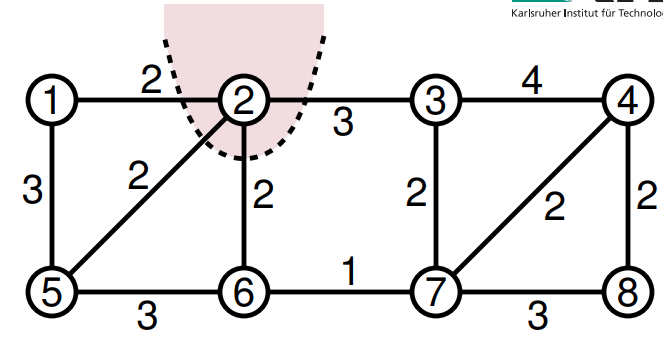

- Knoten mit stärkster Verbindung zum Knoten wird ausgewählt
  
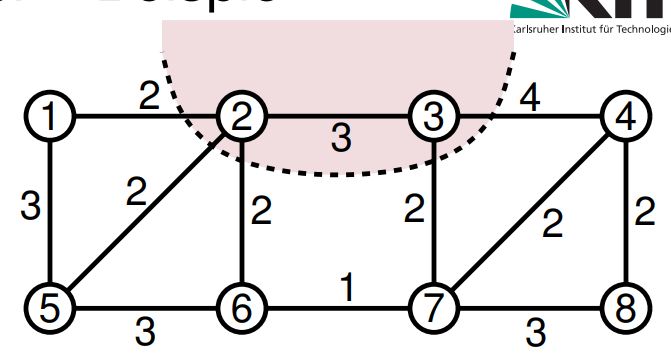
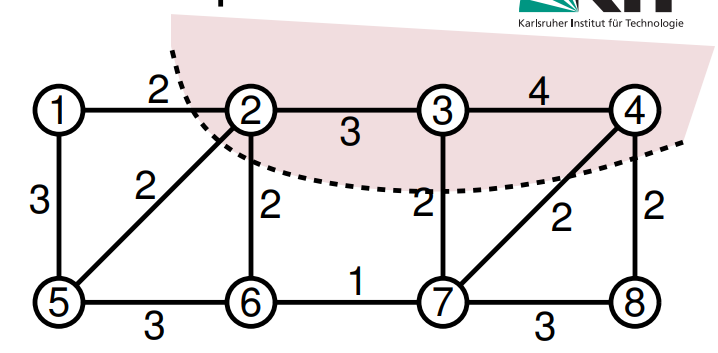

- Die Schritte werden wiederholt bis nur noch zwei Knoten übrig sind
- Der minimale Schnitt ist die Summe der Kanten zwischen den beiden Knoten
- Die Knoten werden verschmolzen und der Algorithmus wird wiederholt

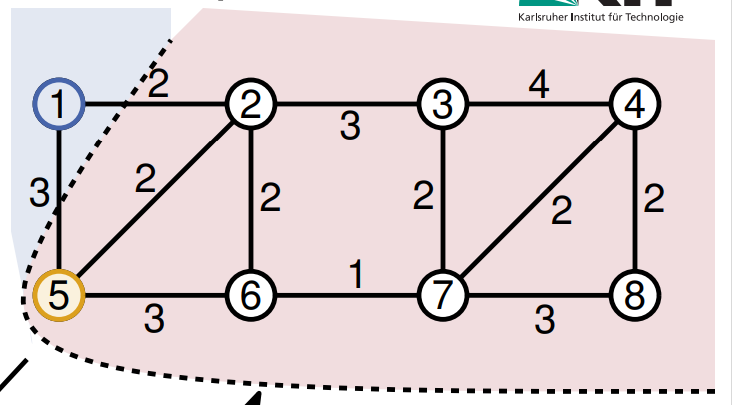
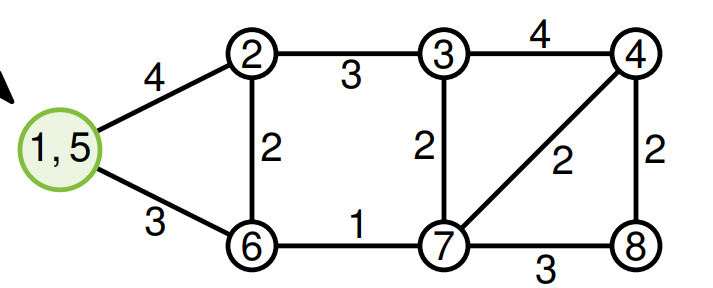

- Nach 7 Phasen kann der Algorithmus beendet werden

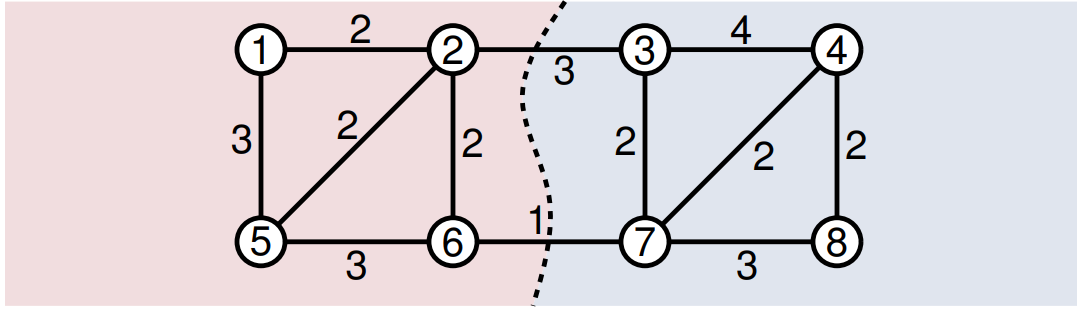


Als Beispiel eine Implementierung in Python:

In [22]:
def mark_cut(G, S, T):
    """Marks the cut between S and T in G."""
    for u, v in G.edges():
        if u in S and v in T or u in T and v in S:
            G[u][v]["color"] = "r"
        else:
            G[u][v]["color"] = "black"

In [23]:
def plot_graph(G):
    """plots the graph G"""
    pos=nx.spring_layout(G)
    nx.draw_networkx(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]

    nx.draw(G, pos, edge_color=colors)

(4, ([8, 3, 4, 7], [1, 2, 5, 6]))

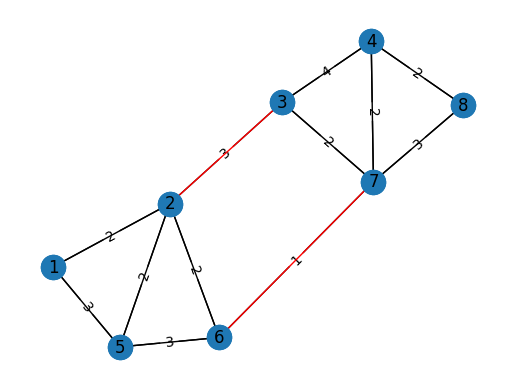

In [24]:
# make a simple graph
G = nx.Graph()
G.add_edge(1, 2, weight=2)
G.add_edge(2, 3, weight=3)
G.add_edge(3, 4, weight=4)

G.add_edge(1, 5, weight=3)
G.add_edge(2, 5, weight=2)
G.add_edge(2, 6, weight=2)
G.add_edge(3, 7, weight=2)
G.add_edge(4, 7, weight=2)
G.add_edge(4, 8, weight=2)

G.add_edge(5, 6, weight=3)
G.add_edge(6, 7, weight=1)
G.add_edge(7, 8, weight=3)

# find the minimum cut
cut_value, partion = nx.stoer_wagner(G)

# plot the results
mark_cut(G, partion[0], partion[1])
plot_graph(G)

cut_value, partion

In `partion` sind die Abschließenden zwei Teile des Graphen. In `cut_value` ist das Gewicht der Kanten zwischen den beiden Teilen gespeichert.

## Part 1

In [25]:
test_puzzle_input_part_1 = """jqt: rhn xhk nvd
rsh: frs pzl lsr
xhk: hfx
cmg: qnr nvd lhk bvb
rhn: xhk bvb hfx
bvb: xhk hfx
pzl: lsr hfx nvd
qnr: nvd
ntq: jqt hfx bvb xhk
nvd: lhk
lsr: lhk
rzs: qnr cmg lsr rsh
frs: qnr lhk lsr""".splitlines()

Grafische Darstellung von den Test-Daten

In [26]:
def make_graph(input):
    """Make a graph from the input"""
    graph = nx.Graph()
    for line in input:
        source, targets = line.split(':')
        source = source.strip()
        targets = targets.strip().split()
        for target in targets:
            graph.add_edge(source, target)
    return graph

(3,
 (['qnr', 'cmg', 'lsr', 'rsh', 'lhk', 'frs', 'pzl', 'nvd', 'rzs'],
  ['jqt', 'rhn', 'bvb', 'ntq', 'hfx', 'xhk']))

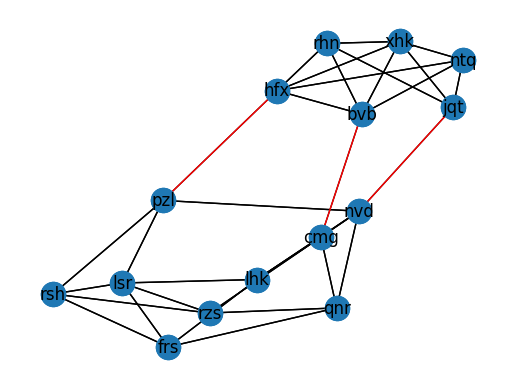

In [27]:
G = make_graph(test_puzzle_input_part_1)
cut_value, partion = nx.stoer_wagner(G)

mark_cut(G, partion[0], partion[1])
plot_graph(G)

cut_value, partion

Zu erkennen ist, dass zwischen `nvd,jqt`, `cmg,bvb` und `pzl,hfx` jeweils ein Schnitt gezogen werden kann. Im Anschluss entstehen zwei Gruppen mit jeweils 9 und 6 Knoten. Die Summe der Kanten zwischen den beiden Gruppen ist 54.

In [28]:
def part_1(input):
    """Part 1 solver"""
    graph = make_graph(input)
    cut_value, partion = nx.stoer_wagner(graph)
    return len(partion[0]) * len(partion[1])

assert part_1(test_puzzle_input_part_1) == 54

In [29]:
part_1(puzzle_input)

572000